## Bibliotecas

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

PATH = '/content/drive/'
DIR = PATH + 'MyDrive/MC936/P3/'
FILE = DIR + 'data/My-Inflamome_analyzed_network.csv'

drive.mount(PATH, force_remount=True)

Mounted at /content/drive/


## Abrir o arquivo com os dados da rede adquiridos do Cytoscape

In [ ]:
# Abrir a tabela com os dados da rede
mi_df = pd.read_csv(FILE) 
mi_df

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,fastGreedy_cluster,glay_cluster,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,5.326482,0.000000,0.187741,0.000000,1,8,18,17,False,ATXN7L2,8.000000,0,1,0,0.987532,False,0,ATXN7L2,0,0.000000
1,4.326877,0.003004,0.231114,0.000000,8,7,18,17,False,LAMB1,6.500000,0,8,0,0.990412,False,0,LAMB1,238506,0.161765
2,4.405138,0.000508,0.227008,0.000000,2,8,2,1,False,LRP2,8.000000,0,2,0,0.990187,False,0,LRP2,38386,0.500000
3,3.409486,0.007403,0.293299,0.087912,18,7,2,1,False,ABL1,34.142857,0,18,4,0.993056,False,0,ABL1,474278,0.100426
4,4.930435,0.000000,0.202822,0.000000,1,8,3,17,False,RAB35,19.000000,0,1,0,0.988673,False,0,RAB35,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,4.577470,0.000000,0.218461,0.000000,1,8,6,1,False,CACNB3,52.000000,0,1,0,0.989690,False,0,CACNB3,0,0.000000
2527,4.577470,0.000000,0.218461,0.000000,1,8,6,1,False,BAIAP2L1,52.000000,0,1,0,0.989690,False,0,BAIAP2L1,0,0.000000
2528,4.138340,0.000000,0.241643,0.000000,1,8,11,3,False,PAX5,33.000000,0,1,0,0.990956,False,0,PAX5,0,0.000000
2529,4.206719,0.000000,0.237715,0.000000,1,8,6,2,False,TRIM38,33.000000,0,1,0,0.990759,False,0,TRIM38,0,0.000000


In [ ]:
mi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AverageShortestPathLength     2531 non-null   float64
 1   BetweennessCentrality         2531 non-null   float64
 2   ClosenessCentrality           2531 non-null   float64
 3   ClusteringCoefficient         2531 non-null   float64
 4   Degree                        2531 non-null   int64  
 5   Eccentricity                  2531 non-null   int64  
 6   fastGreedy_cluster            2531 non-null   int64  
 7   glay_cluster                  2531 non-null   int64  
 8   IsSingleNode                  2531 non-null   bool   
 9   name                          2530 non-null   object 
 10  NeighborhoodConnectivity      2531 non-null   float64
 11  NumberOfDirectedEdges         2531 non-null   int64  
 12  NumberOfUndirectedEdges       2531 non-null   int64  
 13  Par

## Análise sobre algumas propriedades da rede My-Inflamome

In [ ]:
# DataFrame com os módulos e seus respectivos números de nós
clusters = mi_df.groupby(by='glay_cluster')
lista = list(mi_df['glay_cluster'].unique())
lista.sort()
modules_df = pd.DataFrame(data={'Module': lista, 
                                'NumberOfNodes': list(clusters['Degree'].count())})

modules_df

,Module,NumberOfNodes
0,1,450
1,2,505
2,3,256
3,4,153
4,5,428
5,6,5
6,7,85
7,8,125
8,9,58
9,10,10


In [ ]:
print(sum(modules_df['NumberOfNodes']))

2531


In [ ]:
# Cria um Dataframe de um recorte da rede
# com as 10 proteinas com maior BetweennessCentrality
top_BC_df = mi_df.sort_values('BetweennessCentrality',
                              ascending=False).copy()[['name', 'Degree',
                              'BetweennessCentrality']][:10].reset_index()


In [ ]:
top_BC_df

,index,name,Degree,BetweennessCentrality
0,453,MYC,347,0.171074
1,442,IKBKE,346,0.167659
2,1246,TRAF6,362,0.159364
3,517,TP53,258,0.120615
4,641,EGFR,188,0.112668
5,1734,TRAF2,151,0.079370
6,867,MAP3K3,176,0.062778
7,1540,IKBKG,159,0.050374
8,84,GRB2,32,0.047369
9,385,UBC,41,0.045917


In [ ]:
# Correlação de Spearman entre as propriedades da Rede
mi_df.corr('spearman')

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,fastGreedy_cluster,glay_cluster,IsSingleNode,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,Stress,TopologicalCoefficient
AverageShortestPathLength,1.000000,-0.526443,-1.000000,-0.362410,-0.483582,0.756038,-0.116437,0.086417,NaN,-0.593590,NaN,-0.484727,-0.134432,-1.000000,NaN,-0.153582,-0.580141,-0.386364
BetweennessCentrality,-0.526443,1.000000,0.526443,0.369798,0.888240,-0.419503,0.034615,-0.027071,NaN,-0.151018,NaN,0.888843,0.408273,0.526443,NaN,0.291014,0.984063,0.692695
ClosenessCentrality,-1.000000,0.526443,1.000000,0.362410,0.483582,-0.756038,0.116437,-0.086417,NaN,0.593590,NaN,0.484727,0.134432,1.000000,NaN,0.153582,0.580141,0.386364
ClusteringCoefficient,-0.362410,0.369798,0.362410,1.000000,0.561789,-0.325878,0.061398,-0.228810,NaN,-0.106398,NaN,0.562428,0.296413,0.362410,NaN,0.217461,0.365141,0.382429
Degree,-0.483582,0.888240,0.483582,0.561789,1.000000,-0.387982,0.063210,-0.130315,NaN,-0.217160,NaN,0.999847,0.610766,0.483582,NaN,0.306645,0.879091,0.710147
Eccentricity,0.756038,-0.419503,-0.756038,-0.325878,-0.387982,1.000000,-0.090379,0.012912,NaN,-0.455098,NaN,-0.389209,-0.096424,-0.756038,NaN,-0.100017,-0.451964,-0.341867
fastGreedy_cluster,-0.116437,0.034615,0.116437,0.061398,0.063210,-0.090379,1.000000,-0.211311,NaN,-0.035607,NaN,0.063184,-0.023365,0.116437,NaN,0.017053,0.055000,0.112359
glay_cluster,0.086417,-0.027071,-0.086417,-0.228810,-0.130315,0.012912,-0.211311,1.000000,NaN,0.123105,NaN,-0.130076,-0.121097,-0.086417,NaN,-0.080131,-0.028176,-0.015690
IsSingleNode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NeighborhoodConnectivity,-0.593590,-0.151018,0.593590,-0.106398,-0.217160,-0.455098,-0.035607,0.123105,NaN,1.000000,NaN,-0.216335,-0.285819,0.593590,NaN,-0.189826,-0.077808,-0.030993


In [ ]:
# Estatísticas descritivas da propriedade grau
mi_df['Degree'].describe()

count    2531.000000
mean        4.844725
std        17.556098
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       362.000000
Name: Degree, dtype: float64

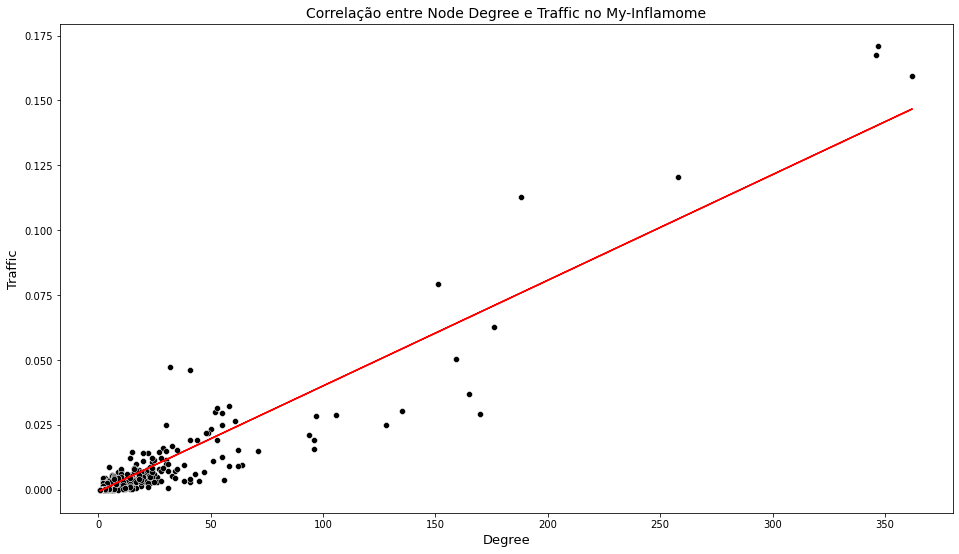

In [ ]:
# Plot relação Degree x Betweenness Centrality
plt.figure(figsize = (16,9))
ax = sns.scatterplot(data=mi_df, x='Degree', y='BetweennessCentrality', color='black')
ax.set_title("Correlação entre Node Degree e Traffic no My-Inflamome", fontsize=14)
ax.set_xlabel("Degree", fontsize=13)
ax.set_ylabel("Traffic", fontsize=13)

x = np.array(mi_df['Degree'])
y = np.array(mi_df['BetweennessCentrality'])
a, b = np.polyfit(x, y, 1)

plt.plot(x, a*x+b, color='red')
# plt.savefig('degree_vs_traffic_ours.png')
plt.show()

# Análise quantitativa sobre os clusters

In [ ]:
def makeInfoClusterdf(model):
  #Cria um novo dataFrame para armazenar os dados dos clusters
  cluster_info = pd.DataFrame(columns=['Module', 'NP', 'MBC'])
  rangeCluster = len( mi_df[model].value_counts() )
  #Percorrer clusters recolhendos dados
  for i in range(1, rangeCluster+1):
    cluster = mi_df.query(f'{model} == @i')
    betweenness_mean = cluster['BetweennessCentrality'].mean()
    count = len(cluster)
    new_row = {'Module':i, 'NP':count, 'MBC':betweenness_mean}
    #adiciona uma nova linha ao dataframe
    cluster_info = cluster_info.append(new_row, ignore_index=True)
  cluster_info = cluster_info.astype({"Module":'int', "NP":'int', 'MBC': 'float'}) 
  return cluster_info

fastGreedy_cluster_info = makeInfoClusterdf('fastGreedy_cluster')
glay_cluster_info = makeInfoClusterdf('glay_cluster')

In [ ]:
display(fastGreedy_cluster_info)

display(glay_cluster_info)

,Module,NP,MBC
0,1,43,0.001516
1,2,298,0.001115
2,3,36,0.001305
3,4,180,0.001403
4,5,66,0.001153
5,6,101,0.001300
6,7,179,0.001444
7,8,38,0.001381
8,9,27,0.001285
9,10,39,0.001161


,Module,NP,MBC
0,1,450,0.001428
1,2,505,0.001704
2,3,256,0.001138
3,4,153,0.000850
4,5,428,0.000974
5,6,5,0.000654
6,7,85,0.001112
7,8,125,0.001031
8,9,58,0.000959
9,10,10,0.000772


# Análise sobre as proteínas mais importantes da rede My-Inflamome

In [ ]:
mi_df = pd.read_csv(FILE)

# Proteínas mais importantes em termos de traffic
proteins = ['MYC', 'IKBKE', 'TRAF6', 'TP53', 'EGFR', 
            'TRAF2', 'MAP3K3', 'IKBKG', 'GRB2', 'UBC']

df = mi_df.query('name == @proteins')
df = df.reset_index(drop = True).copy()
df = df.sort_values(by = 'glay_cluster', ignore_index = True).copy()
df[['name', 'fastGreedy_cluster', 'glay_cluster']]

,name,fastGreedy_cluster,glay_cluster
0,GRB2,12,1
1,EGFR,7,1
2,UBC,11,2
3,MAP3K3,24,2
4,IKBKG,19,2
5,TRAF2,13,2
6,TP53,4,3
7,IKBKE,12,5
8,TRAF6,17,5
9,MYC,2,14
